<a href="https://colab.research.google.com/github/dinuka125/japura-Git-Workshop/blob/master/CARG_CNN%2BLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
path ='/content/drive/My Drive/csv_files/'

Mounted at /content/drive


In [2]:
import numpy as np

data=np.load(path+'dataCARG.npy')
target=np.load(path+'targetCARG.npy')

In [3]:
print(data.shape)
print(target.shape)
print(data.shape[1:])

(2354, 50, 4)
(2354,)
(50, 4)


In [4]:
train_data=data[:1647]
train_target=target[:1647]

test_data=data[1647:]
test_target=target[1647:]

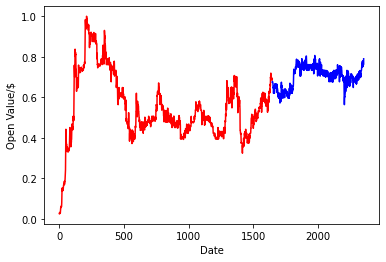

In [5]:
from matplotlib import pyplot as plt

test_x_range=np.arange(1647,2354,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [6]:

from keras.layers import Input
from keras.models import Model
from keras.layers import LSTM
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Flatten

input_layer = Input(shape=(data.shape[1:]))
conv1 = Conv1D(filters=256,
               kernel_size=3,
               strides=1,
               activation='relu',
              padding='same')(input_layer)

conv1=(MaxPooling1D(pool_size=2))(conv1)

droup0=(Dropout(0.2))(conv1)
#conv2=Conv1D(filters=128,kernel_size=3,activation='relu')(conv1)
#pool1=(MaxPooling1D(pool_size=2))(conv2)
#pool1=(Dropout(0.2))(pool1)
#conv3=Conv1D(filters=64,kernel_size=3,activation='relu')(pool1)
#pool2=(MaxPooling1D(pool_size=2))(conv3)

#flt=Flatten()(pool2)
#lstm1 = LSTM(96, return_sequences=True)(droup0)
#droup9=(Dropout(0.2))(lstm1)

lstm1 = LSTM(96, return_sequences=True)(droup0)
droup9=(Dropout(0.2))(lstm1)

lstm2=LSTM(units=96,return_sequences=True)(droup9)
droup1=(Dropout(0.2))(droup0)

lstm3=LSTM(units=96,return_sequences=True)(droup1)
drop2=Dropout(0.2)(lstm3)

lstm4=LSTM(units=96,return_sequences=False)(drop2)
drop3=(Dropout(0.2))(lstm4)


#dense1=Dense(units=1,activation='linear')(drop3)

output_layer = Dense(1, activation='linear')(drop3)
model = Model(inputs=input_layer, outputs=output_layer)

model.compile(loss='mse',optimizer='adam',metrics=['mse', 'mae', 'mape'])

model.summary()



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 4)]           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 50, 256)           3328      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 25, 256)           0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 256)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 25, 256)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 25, 96)            135552    
_________________________________________________________________
dropout_3 (Dropout)          (None, 25, 96)            0     

In [7]:
history=model.fit(train_data,train_target,epochs=200,validation_split=0.10)

Epoch 1/200
47/47 [==============================] - 35s 50ms/step - loss: 0.0354 - mse: 0.0354 - mae: 0.1399 - mape: 27.3211 - val_loss: 0.0010 - val_mse: 0.0010 - val_mae: 0.0260 - val_mape: 4.6808
Epoch 2/200
47/47 [==============================] - 1s 20ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0502 - mape: 10.1148 - val_loss: 9.8368e-04 - val_mse: 9.8368e-04 - val_mae: 0.0258 - val_mape: 4.5902
Epoch 3/200
47/47 [==============================] - 1s 20ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0492 - mape: 9.7333 - val_loss: 0.0015 - val_mse: 0.0015 - val_mae: 0.0315 - val_mape: 5.7992
Epoch 4/200
47/47 [==============================] - 1s 20ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0494 - mape: 9.8804 - val_loss: 9.6779e-04 - val_mse: 9.6779e-04 - val_mae: 0.0254 - val_mape: 4.4929
Epoch 5/200
47/47 [==============================] - 1s 20ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0467 - mape: 9.6862 - val_loss: 0.0014 - val_mse: 0.0014 - val_mae: 0.0307 - val_mape

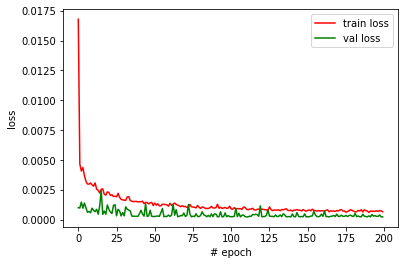

In [8]:
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [9]:
result=model.predict(test_data)

from sklearn.metrics import r2_score

r2=r2_score(test_target,result)
print('r2 score:',r2)

r2 score: 0.8951680144042671


In [10]:
score = model.evaluate(test_data, test_target, verbose = 0) 
print("%s: %.2f%%" % (model.metrics_names[0], score[0]))
print("%s: %.2f%%" % (model.metrics_names[1], score[1]))
print("%s: %.2f%%" % (model.metrics_names[2], score[2]))
print("%s: %.2f%%" % (model.metrics_names[3], score[3]))
#print('Test loss:', score[0]) 
print('MAPE:', score[3])

loss: 0.00%
mse: 0.00%
mae: 0.01%
mape: 1.78%
MAPE: 1.784776210784912


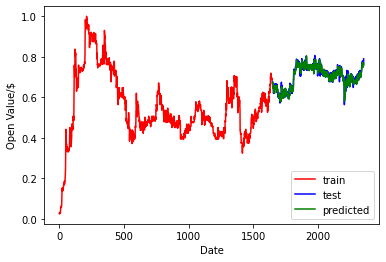

In [11]:
#test_x_range=np.arange(1000,1209,1)

test_x_range=np.arange(1647,2354,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.plot(test_x_range,result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

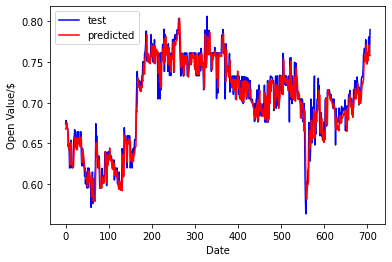

In [12]:
plt.plot(test_target,'b',label='test')
plt.plot(result,'r',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()